In [2]:
import pandas as pd

# Load master_df
master_df = pd.read_csv(r"C:\Users\ASUS\OneDrive\Desktop\UA\master_df.csv")


In [3]:
# Average difficulty score by destination
dest_difficulty = master_df.groupby('scheduled_arrival_station_code')['Flight_Difficulty_Score'] \
                           .mean().sort_values(ascending=False)

print("Top 10 difficult destinations:")
print(dest_difficulty.head(10))


Top 10 difficult destinations:
scheduled_arrival_station_code
BRU    0.346316
GRU    0.291204
HND    0.286471
FRA    0.265952
HNL    0.257367
ATH    0.232628
NAS    0.222558
AUA    0.216641
DUB    0.209229
CDG    0.193780
Name: Flight_Difficulty_Score, dtype: float64


In [4]:
# Select features
features = ['Delay_minutes', 'total_passengers', 'transfer_to_checked_ratio', 'ssr_count', 'tight_ground_time_flag']

# Correlation with Flight Difficulty Score
corr = master_df[features + ['Flight_Difficulty_Score']].corr()['Flight_Difficulty_Score'].sort_values(ascending=False)
print("Feature correlation with Flight Difficulty Score:")
print(corr)


Feature correlation with Flight Difficulty Score:
Flight_Difficulty_Score      1.000000
total_passengers             0.701430
transfer_to_checked_ratio    0.592249
tight_ground_time_flag       0.552612
Delay_minutes                0.427196
ssr_count                    0.412826
Name: Flight_Difficulty_Score, dtype: float64


C:\Users\ASUS\AppData\Local\Temp\ipykernel_11484\623756389.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


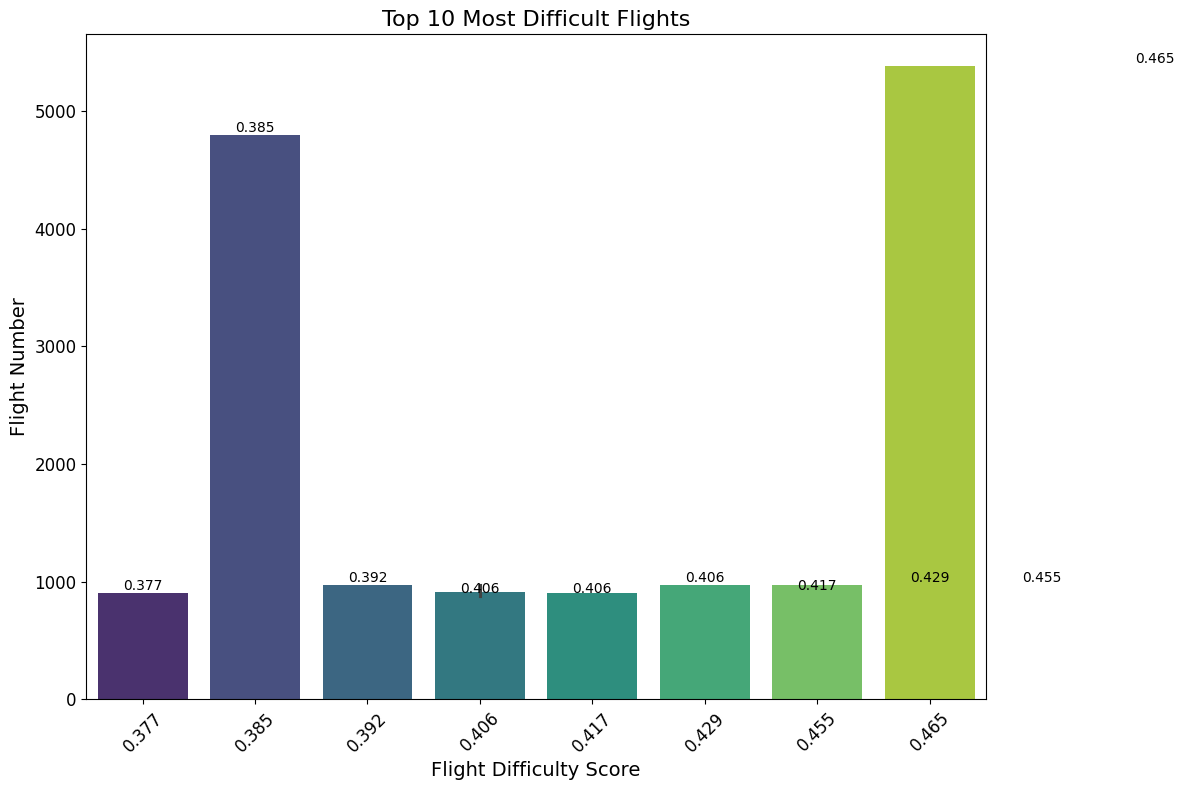

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,8))

# Sort ascending so the highest score is at top
top_flights_sorted = top_flights.sort_values('Flight_Difficulty_Score', ascending=True).copy()

# Round scores for x-axis labels
top_flights_sorted['Score_Label'] = top_flights_sorted['Flight_Difficulty_Score'].round(3).astype(str)

# Plot using the string labels
ax = sns.barplot(
    data=top_flights_sorted, 
    x='Score_Label', 
    y='flight_number', 
    palette='viridis'
)

# Add numeric labels on bars (rounded) at the end of each bar
for i, v in enumerate(top_flights_sorted['Flight_Difficulty_Score']):
    ax.text(i, top_flights_sorted['flight_number'].iloc[i], f"{v:.3f}", 
            color='black', va='bottom', ha='center', fontsize=10)

plt.title("Top 10 Most Difficult Flights", fontsize=16)
plt.xlabel("Flight Difficulty Score", fontsize=14)
plt.ylabel("Flight Number", fontsize=14)
plt.xticks(rotation=45, fontsize=12)  
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


Flights per difficulty category:
difficulty_category
Medium       4858
Easy         1626
Difficult    1615
Name: count, dtype: int64


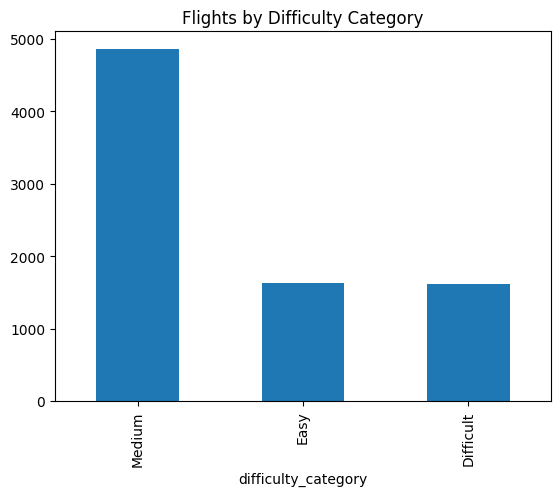

In [6]:
category_counts = master_df['difficulty_category'].value_counts()
print("Flights per difficulty category:")
print(category_counts)

# Optional visualization
category_counts.plot(kind='bar', title='Flights by Difficulty Category')
plt.show()


C:\Users\ASUS\AppData\Local\Temp\ipykernel_11484\562514470.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_dest_df, x='Avg_Difficulty_Score', y='Destination', palette='rocket')


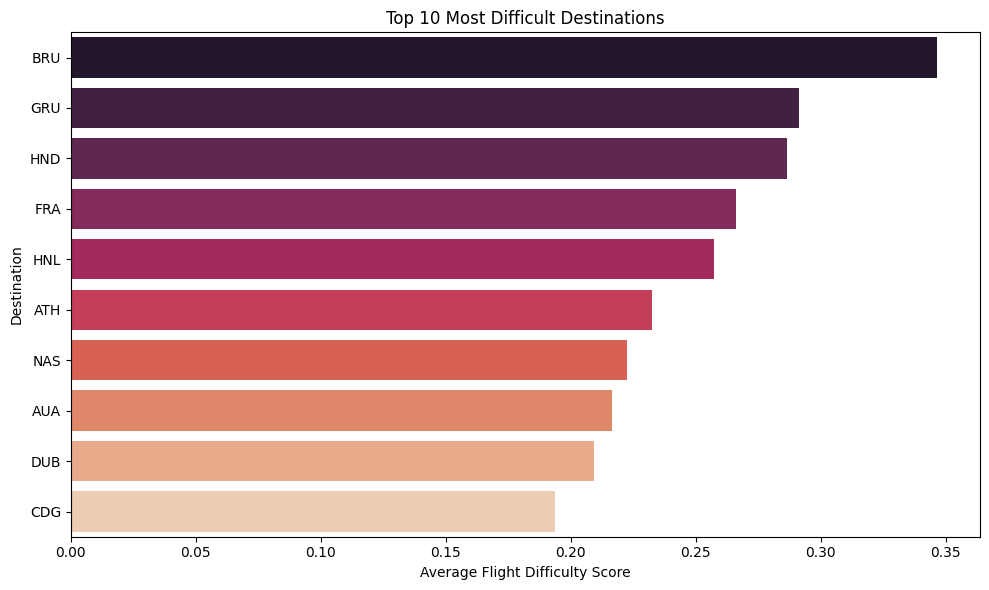

In [15]:
# Convert Series to DataFrame
top_dest_df = top_dest.reset_index().rename(
    columns={'scheduled_arrival_station_code':'Destination', 'Flight_Difficulty_Score':'Avg_Difficulty_Score'}
)

plt.figure(figsize=(10,6))
sns.barplot(data=top_dest_df, x='Avg_Difficulty_Score', y='Destination', palette='rocket')
plt.title("Top 10 Most Difficult Destinations")
plt.xlabel("Average Flight Difficulty Score")
plt.ylabel("Destination")
plt.tight_layout()
plt.show()


C:\Users\ASUS\AppData\Local\Temp\ipykernel_11484\3074277168.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette="mako")


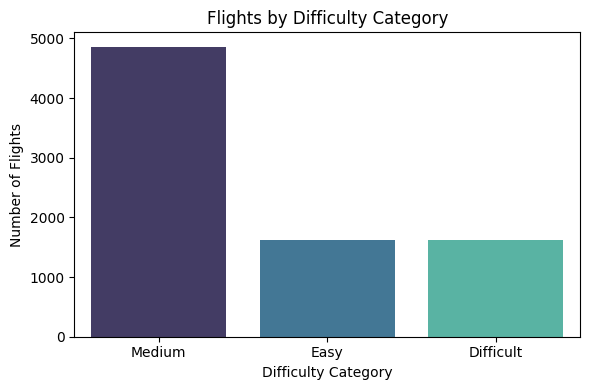

In [10]:
category_counts = master_df['difficulty_category'].value_counts()

plt.figure(figsize=(6,4))
sns.barplot(x=category_counts.index, y=category_counts.values, palette="mako")
plt.title("Flights by Difficulty Category")
plt.ylabel("Number of Flights")
plt.xlabel("Difficulty Category")
plt.tight_layout()
plt.show()


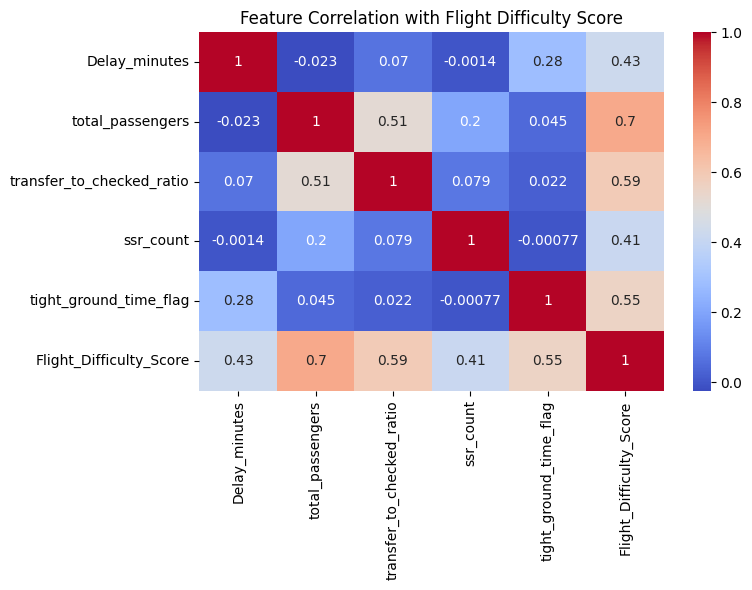

In [11]:
features = ['Delay_minutes', 'total_passengers', 'transfer_to_checked_ratio', 'ssr_count', 'tight_ground_time_flag']
plt.figure(figsize=(8,6))
sns.heatmap(master_df[features + ['Flight_Difficulty_Score']].corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation with Flight Difficulty Score")
plt.tight_layout()
plt.show()


In [13]:
# Top 10 difficult flights
top_flights.to_csv(r"C:\Users\ASUS\OneDrive\Desktop\UA\top_difficult_flights.csv", index=False)

# Top 10 difficult destinations
top_dest.head(10).to_csv(r"C:\Users\ASUS\OneDrive\Desktop\UA\top_difficult_destinations.csv")

# Summary by difficulty category
summary_by_category = master_df.groupby('difficulty_category')[['Delay_minutes','total_passengers','transfer_to_checked_ratio','ssr_count','tight_ground_time_flag']].mean()
summary_by_category.to_csv(r"C:\Users\ASUS\OneDrive\Desktop\UA\summary_by_category.csv")


In [14]:
summary_by_category


,Delay_minutes,total_passengers,transfer_to_checked_ratio,ssr_count,tight_ground_time_flag
difficulty_category,,,,,
Difficult,62.515170,197.045201,65.583901,1.016718,0.385759
Easy,-0.552891,52.107626,18.753998,0.009840,0.000000
Medium,14.720873,131.247015,35.565253,0.401194,0.005970
